In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a36c05a1fe933b68ccbd91ef867bf13e


In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | portland
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | barrow
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | leningradskiy
Processing Record 7 of Set 1 | saleaula
City not found. Skipping...
Processing Record 8 of Set 1 | saint george
Processing Record 9 of Set 1 | kodiak
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | pozo colorado
Processing Record 12 of Set 1 | herat
Processing Record 13 of Set 1 | suzun
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | laramie
Processing Record 17 of Set 1 | nikolskoye
Processing Record 18 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 19 of Set 1 | los llanos de aridane
Processing Record 20 of Set 1 | kapaa
Processing Record 21 of Set 1 | hasaki
Proc

Processing Record 35 of Set 4 | khonuu
City not found. Skipping...
Processing Record 36 of Set 4 | lagoa
Processing Record 37 of Set 4 | port-gentil
Processing Record 38 of Set 4 | taoudenni
Processing Record 39 of Set 4 | zhaotong
Processing Record 40 of Set 4 | dunedin
Processing Record 41 of Set 4 | boa vista
Processing Record 42 of Set 4 | mazulskiy
City not found. Skipping...
Processing Record 43 of Set 4 | buraydah
Processing Record 44 of Set 4 | sanmenxia
Processing Record 45 of Set 4 | rawson
Processing Record 46 of Set 4 | santa cruz
Processing Record 47 of Set 4 | nago
Processing Record 48 of Set 4 | champerico
Processing Record 49 of Set 4 | amderma
City not found. Skipping...
Processing Record 50 of Set 4 | kavieng
Processing Record 1 of Set 5 | brenes
Processing Record 2 of Set 5 | faanui
Processing Record 3 of Set 5 | tuy hoa
Processing Record 4 of Set 5 | duma
Processing Record 5 of Set 5 | paamiut
Processing Record 6 of Set 5 | tevaitoa
Processing Record 7 of Set 5 | fa

City not found. Skipping...
Processing Record 24 of Set 8 | nhulunbuy
Processing Record 25 of Set 8 | yulara
Processing Record 26 of Set 8 | husavik
Processing Record 27 of Set 8 | sao jose da coroa grande
Processing Record 28 of Set 8 | port hardy
Processing Record 29 of Set 8 | bandarbeyla
Processing Record 30 of Set 8 | san jose
Processing Record 31 of Set 8 | kutum
Processing Record 32 of Set 8 | labis
Processing Record 33 of Set 8 | poya
Processing Record 34 of Set 8 | bengkulu
Processing Record 35 of Set 8 | birnin kebbi
Processing Record 36 of Set 8 | svetlogorsk
Processing Record 37 of Set 8 | markova
Processing Record 38 of Set 8 | naze
Processing Record 39 of Set 8 | qostanay
Processing Record 40 of Set 8 | jumla
Processing Record 41 of Set 8 | ullal
Processing Record 42 of Set 8 | seoul
Processing Record 43 of Set 8 | san policarpo
Processing Record 44 of Set 8 | port hawkesbury
Processing Record 45 of Set 8 | nicolas bravo
Processing Record 46 of Set 8 | tevriz
Processing R

Processing Record 8 of Set 12 | nikolayevsk-na-amure
Processing Record 9 of Set 12 | saint anthony
Processing Record 10 of Set 12 | mocuba
Processing Record 11 of Set 12 | balykshi
City not found. Skipping...
Processing Record 12 of Set 12 | mossendjo
Processing Record 13 of Set 12 | dehloran
Processing Record 14 of Set 12 | merauke
Processing Record 15 of Set 12 | le vauclin
Processing Record 16 of Set 12 | verkhnevilyuysk
Processing Record 17 of Set 12 | viligili
City not found. Skipping...
Processing Record 18 of Set 12 | kyaukse
Processing Record 19 of Set 12 | dharur
Processing Record 20 of Set 12 | ballina
Processing Record 21 of Set 12 | monastyrshchina
Processing Record 22 of Set 12 | sal rei
Processing Record 23 of Set 12 | almeria
Processing Record 24 of Set 12 | punuare
Processing Record 25 of Set 12 | venado tuerto
Processing Record 26 of Set 12 | aykhal
Processing Record 27 of Set 12 | salinopolis
Processing Record 28 of Set 12 | olinda
Processing Record 29 of Set 12 | dav

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2020-02-23 05:04:12,-53.15,-70.92,51.80,62,40,21.92
1,Portland,US,2020-02-23 05:04:02,45.52,-122.68,46.40,75,75,4.70
2,Busselton,AU,2020-02-23 05:04:18,-33.65,115.33,87.01,29,99,8.97
3,Barrow,US,2020-02-23 05:04:05,71.29,-156.79,-20.20,75,1,8.05
4,Cape Town,ZA,2020-02-23 05:04:16,-33.93,18.42,64.00,67,0,9.17
5,Leningradskiy,RU,2020-02-23 05:05:07,69.38,178.42,-13.36,95,100,7.31
6,Saint George,US,2020-02-23 05:03:46,37.10,-113.58,45.00,87,90,8.05
7,Kodiak,US,2020-02-23 05:04:15,57.79,-152.41,19.40,62,90,10.29
8,Mataura,NZ,2020-02-23 05:04:16,-46.19,168.86,61.00,73,57,20.00
9,Pozo Colorado,PY,2020-02-23 05:05:08,-23.49,-58.80,60.66,51,0,5.66


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

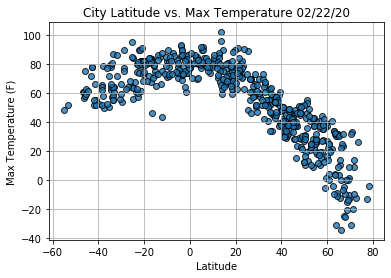

In [12]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

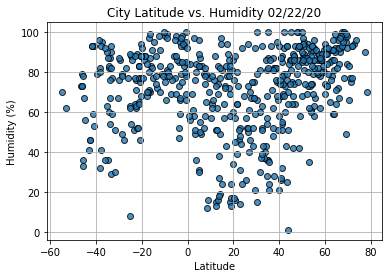

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

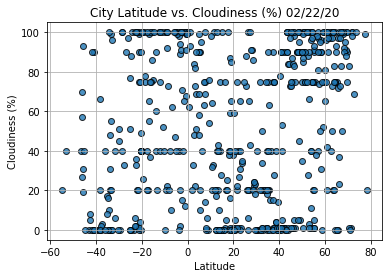

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

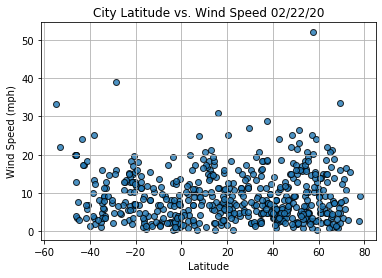

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [16]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [17]:
index13 = city_data_df.loc[13]
index13

City                      Rikitea
Country                        PF
Date          2020-02-23 05:04:15
Lat                        -23.12
Lng                       -134.97
Max Temp                    79.83
Humidity                       64
Cloudiness                      6
Wind Speed                   2.84
Name: 13, dtype: object

In [18]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Portland,US,2020-02-23 05:04:02,45.52,-122.68,46.40,75,75,4.70
3,Barrow,US,2020-02-23 05:04:05,71.29,-156.79,-20.20,75,1,8.05
5,Leningradskiy,RU,2020-02-23 05:05:07,69.38,178.42,-13.36,95,100,7.31
6,Saint George,US,2020-02-23 05:03:46,37.10,-113.58,45.00,87,90,8.05
7,Kodiak,US,2020-02-23 05:04:15,57.79,-152.41,19.40,62,90,10.29


In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n
                       for Maximum Temperature', 'Max Temp',(10,40))

SyntaxError: EOL while scanning string literal (<ipython-input-20-977cc754848a>, line 6)

In [21]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \\n
                        for Maximum Temperature", "Max Temp",(-50,90))

SyntaxError: EOL while scanning string literal (<ipython-input-21-bbd9025ea041>, line 5)

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n
                        for % Humidity', '% Humidity',(40,10))

SyntaxError: EOL while scanning string literal (<ipython-input-22-1d3c2bd0b2d6>, line 6)

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for % Humidity', '% Humidity',(-50,15))

SyntaxError: EOL while scanning string literal (<ipython-input-23-9c3e8b244753>, line 6)

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for % Cloudiness', '% Cloudiness',(-50,60))

SyntaxError: EOL while scanning string literal (<ipython-input-24-3dc99b339452>, line 6)

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n
                        for Wind Speed', 'Wind Speed',(40,35))

SyntaxError: EOL while scanning string literal (<ipython-input-25-7024af74f12d>, line 6)

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for Wind Speed', 'Wind Speed',(-50,35))

SyntaxError: EOL while scanning string literal (<ipython-input-26-8c4f0e57bb27>, line 6)